In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("/content/play_tennis.csv")

In [3]:
df.head()

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes


In [4]:
df.isnull().sum()

,0
day,0
outlook,0
temp,0
humidity,0
wind,0
play,0


In [5]:
le = LabelEncoder()
for column in df.columns:
    df[column] = le.fit_transform(df[column])

print(df)

    day  outlook  temp  humidity  wind  play
0     0        2     1         0     1     0
1     6        2     1         0     0     0
2     7        0     1         0     1     1
3     8        1     2         0     1     1
4     9        1     0         1     1     1
5    10        1     0         1     0     0
6    11        0     0         1     0     1
7    12        2     2         0     1     0
8    13        2     0         1     1     1
9     1        1     2         1     1     1
10    2        2     2         1     0     1
11    3        0     2         0     0     1
12    4        0     1         1     1     1
13    5        1     2         0     0     0


In [11]:
X = df.drop(['play', 'day'], axis=1)
y = df['play']

model = DecisionTreeClassifier(criterion='entropy')  # ID3-like
model.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

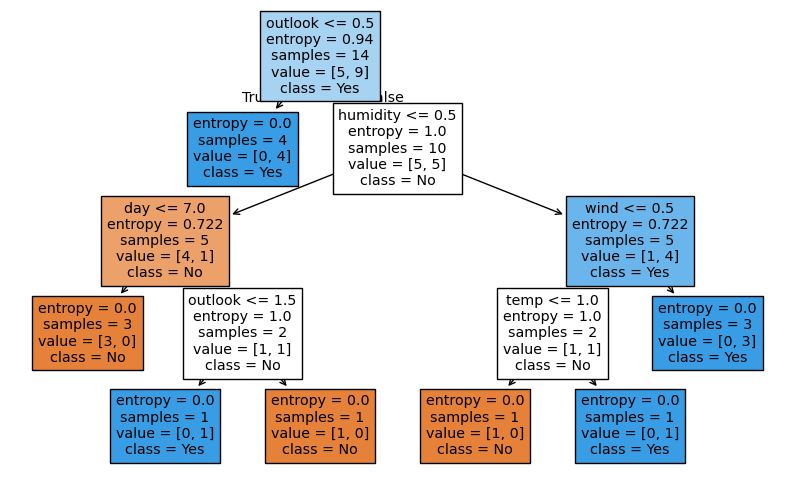

In [8]:
plt.figure(figsize=(10,6))
plot_tree(model, feature_names=X.columns, class_names=['No','Yes'], filled=True)
plt.show()

In [13]:
# Assuming 'day' is not a relevant feature for prediction, we can add a placeholder value (e.g., 0)
# and provide feature names to the input data
test = [[2, 1, 0, 1]]  # Removed placeholder for 'day'
test_df = pd.DataFrame(test, columns=X.columns) # Convert to DataFrame with feature names
prediction = model.predict(test_df)
print("Play Tennis?", "Yes" if prediction[0] == 1 else "No")

Play Tennis? No
